# Домашнє завдання: Вступ до нейронних мереж

**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

In [2]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [3]:
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

In [4]:
inputs_tensor, targets_tensor

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.]]),
 tensor([[0.],
         [1.],
         [1.],
         [0.],
         [1.]]))

2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [5]:
torch.random.manual_seed(1)

Використаємо `torch.randn()`, який згенерує випадкові значення з нормального розподілу.

Необхідно правильно задати розмірності вагового вектора $ \mathbf{w} $ та зміщення $ \mathbf{b} $, враховуючи форму вхідної матриці.

Обчислення передбачення відбувається за формулою:

$$
z = \mathbf{X} \cdot \mathbf{w}^T + b
$$

Вхідна матриця має форму `(5, 3)`, тобто:

$$
\mathbf{X} =
\begin{bmatrix}
73 & 67 & 43 \\
91 & 88 & 64 \\
87 & 134 & 58 \\
102 & 43 & 37 \\
69 & 96 & 70 \\
\end{bmatrix}
\in \mathbb{R}^{5 \times 3}
$$

Отже, вектор ваг $ \mathbf{w} $ повинен мати форму `(1, 3)`:

$$
\mathbf{w} =
\begin{bmatrix}
w_1 & w_2 & w_3
\end{bmatrix}
$$

Зміщення (bias) $ b \in \mathbb{R} $ є скалярною величиною, яка буде broadcast-нута до розміру $ (5, 1) $ при додаванні до результату добутку матриць.


In [6]:
w = torch.randn(1, 3, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [7]:
w, b

(tensor([[0.6614, 0.2669, 0.0617]], requires_grad=True),
 tensor([0.6213], requires_grad=True))

3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [8]:
def sigmoid(z):
  return 1 / (1 + torch.exp(-z))

In [9]:
def model(x, w, b):
  z = x @ w.T + b
  return sigmoid(z)

In [10]:
preds = model(inputs_tensor, w, b)

In [11]:
preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<MulBackward0>)

In [12]:
z = inputs_tensor @ w.T + b
print("z:", z)

z: tensor([[69.4361],
        [88.2410],
        [97.5041],
        [81.8390],
        [76.1967]], grad_fn=<AddBackward0>)


**Спостереження:**

Усі передбачення є 1. Це зумовлено тим, що на цьому етапі модель ще не навчена: ваги та зміщення були ініціалізовані випадковими значеннями з нормального розподілу.

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

Маємо бінарну крос-ентропію:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

середнє значення втрат по всьому набору даних можемо представити, як:

$$
\text{Loss} = \frac{1}{N} \sum_{i=1}^N L(y_i, \hat{y}_i)
$$

Щоб уникнути обчислення $\log(0)$, перед обчисленням логарифму обмежемо  значення $\hat{y}$ в межах $[\epsilon, 1 - \epsilon]$, де $\epsilon = 1e-7$.


In [13]:
def binary_cross_entropy(predicted_probs, true_labels):
  eps = 1e-7
  predicted_probs = torch.clamp(predicted_probs, eps, 1 - eps)
  loss = -(true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))
  return torch.mean(loss)

In [14]:
loss = binary_cross_entropy(targets_tensor, preds)
loss.item()

6.447237968444824

5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [15]:
loss.backward()
print("Градієнти w:", w.grad)
print("Градієнт b:", b.grad)

Градієнти w: tensor([[1.6425e-28, 1.5066e-28, 9.6672e-29]])
Градієнт b: tensor([2.2498e-30])


**Спостереження**:

- Градієнти мають дуже низькі значення, оскільки сигмоїда наситилась, передбачення стали майже рівними 1, а похідна — майже нульовою, що призвело до занулення градієнтів.

**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [16]:
torch.random.manual_seed(1)
w = torch.randn(1, 3, requires_grad=True)  # Листовий тензор
b = torch.randn(1, requires_grad=True)     # Листовий тензор

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

In [17]:
preds = model(inputs_tensor, w, b)
preds

tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)

In [18]:
loss = binary_cross_entropy(targets_tensor, preds)
loss.item()

7.919526100158691

In [19]:
loss.backward()
print("Градієнти w:", w.grad)
print("Градієнт b:", b.grad)

Градієнти w: tensor([[ -55.6781, -164.4566,  -88.3763]])
Градієнт b: tensor([-0.7773])


**Спостереження**:

Бачимо, що насичення сигмоїди вдалось уникнути, через зниження значень початкових ваг, і градієнти мають достатньо більші значення, чим у минулій спробі.

6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [20]:
def train_logistic_regression(x, y, epochs=1000, learning_rate=0.0001, verbose=True):
  torch.manual_seed(1)
  w = torch.randn(1, x.shape[1], requires_grad=True)
  b = torch.randn(1, requires_grad=True)
  w.data = w.data / 1000
  b.data = b.data / 1000

  losses = []
  for epoch in range(epochs):
    y_hat = model(x, w, b)
    loss = binary_cross_entropy(y, y_hat)
    losses.append(loss.item())
    loss.backward()
    with torch.no_grad():
      w -= learning_rate * w.grad
      b -= learning_rate * b.grad
    w.grad.zero_()
    b.grad.zero_()
    if verbose and epoch % 100 == 0:
            print(f"Epoch {epoch:4d}: Loss = {loss.item():.4f}")
  final_preds = model(x, w, b)
  return w, b, losses, final_preds

In [21]:
w_trained, b_trained, losses, preds = train_logistic_regression(inputs_tensor, targets_tensor)

Epoch    0: Loss = 7.9195
Epoch  100: Loss = 2.5264
Epoch  200: Loss = 2.1626
Epoch  300: Loss = 1.8747
Epoch  400: Loss = 1.6342
Epoch  500: Loss = 1.4330
Epoch  600: Loss = 1.2651
Epoch  700: Loss = 1.1250
Epoch  800: Loss = 1.0077
Epoch  900: Loss = 0.9089


In [22]:
print("Остаточні передбачення:\n", preds)

Остаточні передбачення:
 tensor([[1.4863e-01],
        [8.9306e-01],
        [9.9838e-01],
        [6.8112e-08],
        [1.0000e+00]], grad_fn=<MulBackward0>)


In [23]:
df_preds = pd.DataFrame({
    "True Label": targets_tensor.numpy().flatten(),
    "Predicted Prob": [round(p, 4) for p in preds.detach().numpy().flatten()]
})

df_preds

,True Label,Predicted Prob
0,0.0,0.1486
1,1.0,0.8931
2,1.0,0.9984
3,0.0,0.0000
4,1.0,1.0000


In [24]:
def plot_losses(losses):
    plt.figure(figsize=(8, 5))
    plt.plot(losses, label='Loss')
    plt.xlabel("Епоха")
    plt.ylabel("Значення функції втрат")
    plt.title("Зменшення функції втрат під час навчання")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

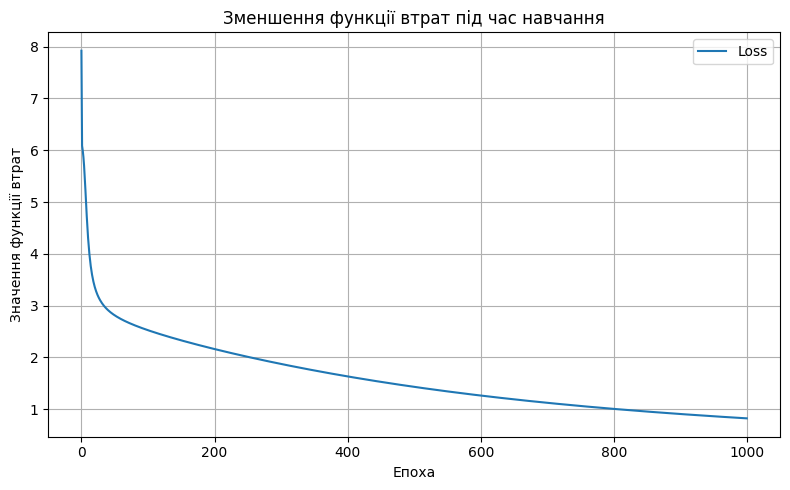

In [25]:
plot_losses(losses)

**Спостерження**:

Бачимо, що функція втрат поступово зменшується, що свідчить про наближення передбачень моделі до рельних значень. Фінальні передбачення мають значення, близькі до 0 або 1, що відповідає правильній класифікації прикладів.

Також з графіку можна бачити стабільне зменшення втрат протягом навчання.




**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [26]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [27]:
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

In [28]:
inputs_tensor = (inputs_tensor - inputs_tensor.mean(0)) / inputs_tensor.std(0)
inputs_tensor = inputs_tensor.float()
targets_tensor = targets_tensor.float().view(-1, 1)

In [29]:
train_ds = TensorDataset(inputs_tensor, targets_tensor)
train_ds[0:3]

(tensor([[-0.9132, -0.5913, -0.8811],
         [ 0.5287,  0.0763,  0.7420],
         [ 0.2083,  1.5387,  0.2782]]),
 tensor([[0.],
         [1.],
         [1.]]))

8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [30]:
dataset = TensorDataset(inputs_tensor, targets_tensor)
train_dl = DataLoader(dataset, batch_size=5, shuffle=True)

In [31]:
train_dl = DataLoader(dataset, batch_size=5, shuffle=True)
next(iter(train_dl))

[tensor([[-0.9132, -0.5913, -0.8811],
         [ 0.5287,  0.0763,  0.7420],
         [ 1.4099, -1.3543, -1.3448],
         [-1.2337,  0.3306,  1.2057],
         [ 1.4099, -1.3543, -1.3448]]),
 tensor([[0.],
         [1.],
         [0.],
         [1.],
         [0.]])]

9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [32]:
class LogReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [33]:
model = LogReg(input_dim=3)

In [34]:
model

LogReg(
  (linear): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [35]:
opt = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.functional.binary_cross_entropy

In [36]:
preds = model(inputs_tensor)
loss = loss_fn(preds, targets_tensor)

In [37]:
preds

tensor([[0.4814],
        [0.5028],
        [0.4095],
        [0.6472],
        [0.3924],
        [0.4814],
        [0.5028],
        [0.4095],
        [0.6472],
        [0.3924],
        [0.4814],
        [0.5028],
        [0.4095],
        [0.6472],
        [0.3924]], grad_fn=<SigmoidBackward0>)

In [38]:
loss

tensor(0.8429, grad_fn=<BinaryCrossEntropyBackward0>)

In [39]:
df_preds = pd.DataFrame({
    "True Label": targets_tensor.numpy().flatten(),
    "Predicted Prob": [round(p, 4) for p in preds.detach().numpy().flatten()]
})

In [40]:
threshold = 0.5
df_preds["Predicted Label"] = (df_preds["Predicted Prob"] >= threshold).astype(int)

In [41]:
df_preds

,True Label,Predicted Prob,Predicted Label
0,0.0,0.4814,0
1,1.0,0.5028,1
2,1.0,0.4095,0
3,0.0,0.6472,1
4,1.0,0.3924,0
5,0.0,0.4814,0
6,1.0,0.5028,1
7,1.0,0.4095,0
8,0.0,0.6472,1
9,1.0,0.3924,0


**Спостереження**:

Бачимо, що модель часто помиляється: для деяких прикладів із міткою 1 вона передбачає клас 0, і навпаки. Модель не дуже добре навчилася, достатньо велиука кількість помилок.

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [42]:
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0

        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_fn(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        if (epoch + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")
    return losses

In [43]:
losses = fit_return_loss(1000, model, loss_fn, opt, train_dl)

Epoch [100/1000], Loss: 0.2561
Epoch [200/1000], Loss: 0.1460
Epoch [300/1000], Loss: 0.1016
Epoch [400/1000], Loss: 0.0777
Epoch [500/1000], Loss: 0.0628
Epoch [600/1000], Loss: 0.0526
Epoch [700/1000], Loss: 0.0453
Epoch [800/1000], Loss: 0.0397
Epoch [900/1000], Loss: 0.0353
Epoch [1000/1000], Loss: 0.0318


In [44]:
final_preds = model(inputs_tensor).detach()
df_final_preds = pd.DataFrame({
    "True Label": targets_tensor.numpy().flatten(),
    "Predicted Prob": [round(p, 4) for p in final_preds.numpy().flatten()]
})

In [45]:
df_final_preds

,True Label,Predicted Prob
0,0.0,0.0508
1,1.0,0.9435
2,1.0,0.9831
3,0.0,0.0099
4,1.0,0.9784
5,0.0,0.0508
6,1.0,0.9435
7,1.0,0.9831
8,0.0,0.0099
9,1.0,0.9784


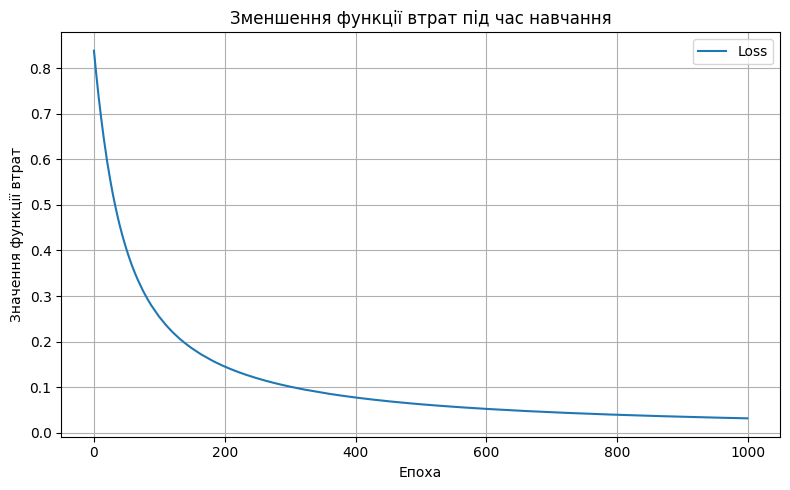

In [46]:
plot_losses(losses)

**Спостереження**:

Бачимо, що значенння функції встрат поступово зменшується, отже модель навчається. З графіку тоже бачимо, що втати поство зменшуються. Також можемо бачити, що після навчання модель стала чітко розділяти класи. Для прикладів із міткою 0 передбачені ймовірності близькі до 0, а для прикладів із міткою 1 передбачені ймовірності близькі до 1.